Text(0.5, 0.95, 'Understanding the distributions used for the simulation')

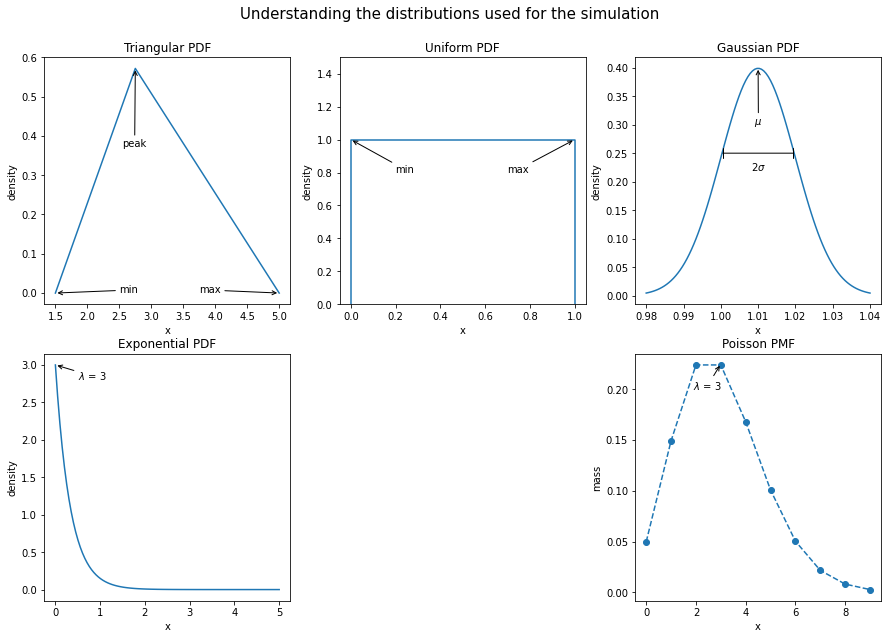

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()
fig.delaxes(axes[-2])

# triangular distribution defined by min (a), max (b) and mode
a, b, mode = 1.5, 5, 2.75
peak = 2 / (b - a)# peak of PDF is at 2/(b-a)
axes[0].plot([a, mode, b], [0, peak, 0])
axes[0].set_title('Triangular PDF')
axes[0].set_xlabel('x')
axes[0].set_ylabel('density')
axes[0].annotate('min', xy=(a, 0), xytext=(a + 1, 0), arrowprops=dict(arrowstyle='->'))
axes[0].annotate('max', xy=(b, 0), xytext=(b - 1.25, 0), arrowprops=dict(arrowstyle='->'))
axes[0].annotate('peak', xy=(mode, peak), xytext=(mode - 0.2, peak - 0.2), arrowprops=dict(arrowstyle='->'))

# uniform distribution defined by min (a) and max (b)
a, b = 0, 1
peak = 1 / (b - a)
axes[1].plot([a, a, b, b], [0, peak, peak, 0])
axes[1].set_title('Uniform PDF')
axes[1].set_ylabel('density')
axes[1].set_xlabel('x')
axes[1].annotate('min', xy=(a, peak), xytext=(a + 0.2, peak - 0.2), arrowprops=dict(arrowstyle='->'))
axes[1].annotate('max', xy=(b, peak), xytext=(b - 0.3, peak - 0.2), arrowprops=dict(arrowstyle='->'))
axes[1].set_ylim(0, 1.5)

# gaussian
mu, sigma = 1.01, 0.01
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
axes[2].plot(x, stats.norm.pdf(x, mu, sigma) / 100)
axes[2].set_title('Gaussian PDF')
axes[2].set_ylabel('density')
axes[2].set_xlabel('x')
axes[2].annotate(r'$\mu$', xy=(mu, 0.4), xytext=(mu - 0.001, 0.3), arrowprops=dict(arrowstyle='->'))
axes[2].annotate(
    '', xy=(mu-sigma, 0.25), xytext=(mu + 0.01, 0.25),
    arrowprops=dict(arrowstyle='|-|, widthB=0.5, widthA=0.5')
)
axes[2].annotate(r'$2\sigma$', xy=(mu - 0.002, 0.22))

# exponential
x = np.linspace(0, 5, 100)
axes[3].plot(x, stats.expon.pdf(x, scale=1/3))
axes[3].set_title('Exponential PDF')
axes[3].set_ylabel('density')
axes[3].set_xlabel('x')
axes[3].annotate(r'$\lambda$ = 3', xy=(0, 3), xytext=(0.5, 2.8), arrowprops=dict(arrowstyle='->'))

# Poisson PMF (probability mass function) because this is a discrete random variable
x = np.arange(0, 10)
axes[5].plot(x, stats.poisson.pmf(x, mu=3), linestyle='--', marker='o')
axes[5].set_title('Poisson PMF')
axes[5].set_ylabel('mass')
axes[5].set_xlabel('x')
axes[5].annotate(r'$\lambda$ = 3', xy=(3, 0.225), xytext=(1.9, 0.2), arrowprops=dict(arrowstyle='->'))

plt.suptitle('Understanding the distributions used for the simulation', fontsize=15, y=0.95)

The simulate.py script can be run from the command line to run the simulation:

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

log = pd.read_csv('log.csv', index_col='datetime', parse_dates=True)
attacks = pd.read_csv(
    'attacks.csv',
    converters={'start' : np.datetime64, 'end': np.datetime64}
) # make start and end columns datetimes but not the index

In [6]:
log.head()

,source_ip,username,success,failure_reason
datetime,,,,
2018-11-01 00:10:24.868560,142.89.86.32,vkim,True,NaN
2018-11-01 00:50:36.191231,142.89.86.32,vkim,True,NaN
2018-11-01 01:01:42.607900,53.218.180.231,ysmith,True,NaN
2018-11-01 01:02:06.374218,53.218.180.231,ysmith,True,NaN
2018-11-01 01:35:19.704392,53.218.180.231,ysmith,True,NaN


In [7]:
attacks.head()

,start,end,source_ip
0,2018-11-01 10:44:29.667759,2018-11-01 10:48:37.667759,23.143.69.122
1,2018-11-02 03:27:23.313068,2018-11-02 03:31:18.313068,141.20.164.200
2,2018-11-02 06:37:54.905352,2018-11-02 06:42:08.905352,200.115.24.107
3,2018-11-02 08:36:24.435229,2018-11-02 08:40:24.435229,207.119.101.16
4,2018-11-02 11:34:18.719900,2018-11-02 11:34:39.719900,66.109.118.50


In [8]:
attacks.source_ip.nunique() / log.source_ip.nunique()

0.13220338983050847

Text(0, 0.5, 'attempts')

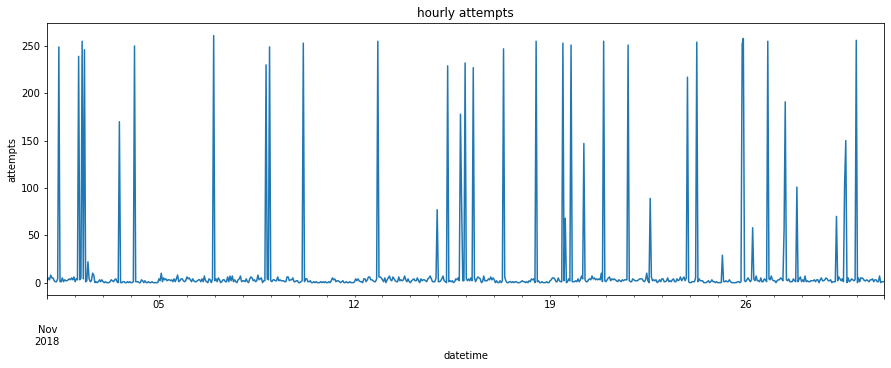

In [10]:
# EDA
# attempts over time
log.assign(attempts=1).attempts.resample('1H').sum().plot(
    figsize=(15, 5), title='hourly attempts'
)
plt.xlabel('datetime')
plt.ylabel('attempts')

In [11]:
log.source_ip.value_counts().describe()

count    295.000000
mean      31.654237
std       70.843718
min        1.000000
25%        3.000000
50%        6.000000
75%       11.000000
max      258.000000
Name: count, dtype: float64

Text(0.5, 0.98, 'Attempts per IP Address')

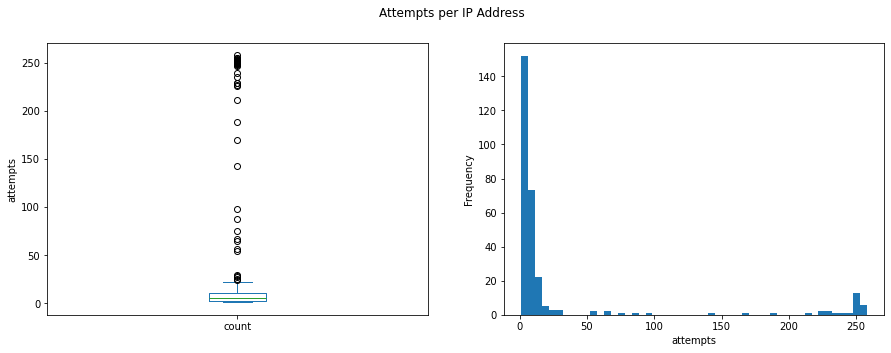

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
log.source_ip.value_counts().plot(kind='box', ax=axes[0]).set_ylabel('attempts')
log.source_ip.value_counts().plot(kind='hist', bins=50, ax=axes[1]).set_xlabel('attempts')
fig.suptitle('Attempts per IP Address')

In [13]:
num_hackers = attacks.source_ip.shape[0]
log.source_ip.value_counts().index[:num_hackers]\
    .isin(attacks.source_ip).sum() / num_hackers

0.9743589743589743

Text(0, 0.5, 'average hourly attempts per IP address')

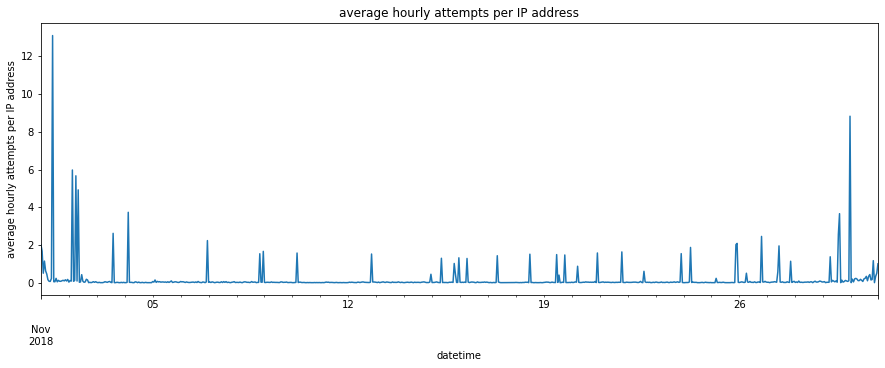

In [14]:
# attempts per ip address
log.assign(attempts=1).groupby('source_ip').attempts\
    .resample('1H').sum().unstack().mean()\
    .plot(figsize=(15, 5), title='average hourly attempts per IP address')\
    .set_ylabel('average hourly attempts per IP address')

In [15]:
log[log.source_ip.isin(attacks.source_ip)]\
    .success.value_counts(normalize=True)

success
False    0.830297
True     0.169703
Name: proportion, dtype: float64

In [16]:
log[~log.source_ip.isin(attacks.source_ip)]\
    .success.value_counts(normalize=True)

success
True     0.987304
False    0.012696
Name: proportion, dtype: float64

In [17]:
pd.crosstab(
    index=pd.Series(
        log.source_ip.isin(attacks.source_ip), name='is_hacker'
    ), columns=log.failure_reason
)

failure_reason,error_wrong_password,error_wrong_username
is_hacker,,
False,20,1
True,2491,3889


Text(0, 0.5, 'average hourly attempts per user')

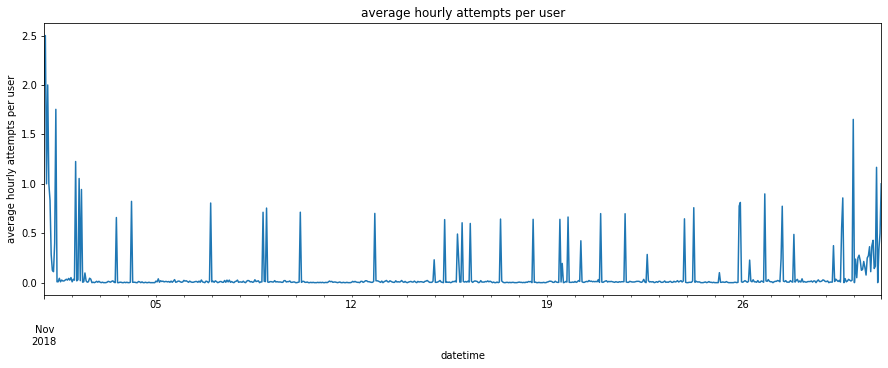

In [18]:
# attempts per user
log.assign(attempts=1).groupby('username').attempts\
    .resample('1H').sum().unstack().mean()\
    .plot(figsize=(15, 5), title='average hourly attempts per user')\
    .set_ylabel('average hourly attempts per user')

In [19]:
pivot = pd.pivot_table(
    log, values='success', index=log.source_ip, 
    columns=log.failure_reason.fillna('success'), 
    aggfunc='count', fill_value=0
)
pivot.insert(0, 'attempts', pivot.sum(axis=1))
pivot = pivot.sort_values('attempts', ascending=False).assign(
    success_rate=lambda x: x.success / x.attempts,
    error_rate=lambda x: 1 - x.success_rate
)
pivot.head()

failure_reason,attempts,error_wrong_password,error_wrong_username,success,success_rate,error_rate
source_ip,,,,,,
135.158.66.165,258,79,146,33,0.127907,0.872093
44.123.120.49,255,83,139,33,0.129412,0.870588
146.116.200.234,255,75,142,38,0.149020,0.850980
200.115.24.107,254,70,145,39,0.153543,0.846457
121.25.210.210,253,76,143,34,0.134387,0.865613


In [20]:
pivot.sort_values('success_rate', ascending=False).head()

failure_reason,attempts,error_wrong_password,error_wrong_username,success,success_rate,error_rate
source_ip,,,,,,
174.192.13.18,6,0,0,6,1.0,0.0
128.154.159.196,3,0,0,3,1.0,0.0
167.46.157.15,4,0,0,4,1.0,0.0
196.30.106.19,4,0,0,4,1.0,0.0
73.106.1.104,4,0,0,4,1.0,0.0


In [21]:
pivot.describe()

failure_reason,attempts,error_wrong_password,error_wrong_username,success,success_rate,error_rate
count,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000
mean,31.654237,8.511864,13.186441,9.955932,0.881996,0.118004
std,70.843718,23.713117,36.971525,11.411062,0.281312,0.281312
min,1.000000,0.000000,0.000000,1.000000,0.107692,0.000000
25%,3.000000,0.000000,0.000000,3.000000,1.000000,0.000000
50%,6.000000,0.000000,0.000000,6.000000,1.000000,0.000000
75%,11.000000,0.000000,0.000000,10.000000,1.000000,0.000000
max,258.000000,95.000000,146.000000,62.000000,1.000000,0.892308


In [22]:
log.groupby('source_ip').agg(
    dict(username='nunique')
).username.value_counts().describe()

count     27.000000
mean      10.925926
std       48.783608
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max      255.000000
Name: count, dtype: float64

<Axes: title={'center': 'successes vs. attempts by IP address'}, xlabel='attempts', ylabel='success'>

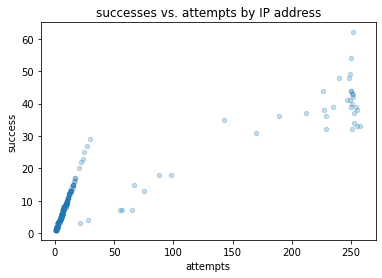

In [23]:
# Visual Anomaly Detection
pivot.plot(
    kind='scatter', x='attempts', y='success', 
    title='successes vs. attempts by IP address', alpha=0.25
)

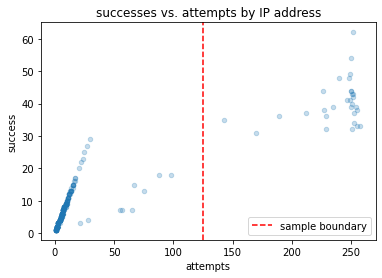

In [24]:
ax = pivot.plot(
    kind='scatter', x='attempts', y='success', 
    title='successes vs. attempts by IP address', alpha=0.25
)
plt.axvline(125, label='sample boundary', color='red', linestyle='--')
plt.legend(loc='lower right')

Text(0.5, 0.98, 'successes vs. attempts by IP address')

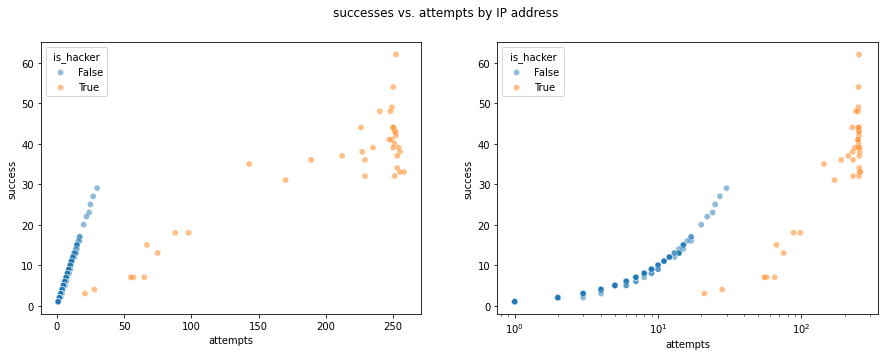

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
for ax in axes:
    sns.scatterplot(
        y=pivot.success, x=pivot.attempts, 
        hue=pivot.assign(
            is_hacker=lambda x: x.index.isin(attacks.source_ip)
        ).is_hacker,
        ax=ax, alpha=0.5
    )
axes[1].set_xscale('log')
plt.suptitle('successes vs. attempts by IP address')

attempts       Axes(0.125,0.125;0.352273x0.755)
success     Axes(0.547727,0.125;0.352273x0.755)
dtype: object

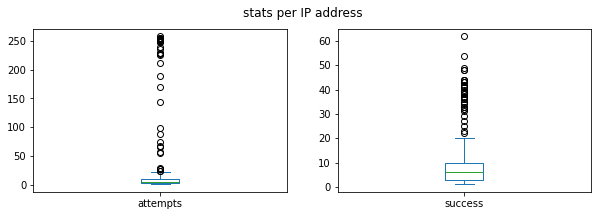

In [26]:
pivot[['attempts', 'success']].plot(
    kind='box', subplots=True, figsize=(10, 3),
    title='stats per IP address'
)

In [27]:
hourly_ip_logs = log.assign(
    failures=lambda x: np.invert(x.success)
).groupby('source_ip').resample('1H').agg(
    {'username': 'nunique', 'success':'sum', 'failures': 'sum'}
).assign(
    attempts=lambda x: x.success + x.failures,
    success_rate=lambda x: x.success / x.attempts,
    failure_rate=lambda x: 1 - x.success_rate
).dropna().reset_index()

In [28]:
hourly_ip_logs.head()

,source_ip,datetime,username,success,failures,attempts,success_rate,failure_rate
0,1.138.149.116,2018-11-01 04:00:00,1,4,1,5,0.8,0.2
1,1.138.149.116,2018-11-01 05:00:00,1,1,0,1,1.0,0.0
2,1.138.149.116,2018-11-07 03:00:00,1,1,0,1,1.0,0.0
3,1.138.149.116,2018-11-29 18:00:00,1,2,0,2,1.0,0.0
4,1.138.149.116,2018-11-29 19:00:00,1,2,0,2,1.0,0.0


Percent Difference from Threshold
Bootstrapping
In our case, the threshold will be an hourly baseline of login activity. We could use bootstrapping to calculate the baseline with random sample of size 10 for each hour:

In [30]:
def get_baselines(hourly_ip_logs, func, *args, **kwargs):
    """
    Calculate hourly bootstrapped statistic per column.
    
    Parameters:
        - hourly_ip_logs: Data to sample from.
        - func: Statistic to calculate.
        - args: Additional positional arguments for `func`
        - kwargs: Additional keyword arguments for `func`
    
    Returns:
        A pandas DataFrame of hourly bootstrapped statistics
    """
    if isinstance(func, str):
        func = getattr(pd.DataFrame, func)
    return hourly_ip_logs.assign(
        hour=lambda x: x.datetime.dt.hour
    ).groupby('hour').apply(
        lambda x: x.sample(10, random_state=0, replace=True).pipe(func, *args, **kwargs)
    )

Trimming
We need to remove some of the outliers for better baselines. Let's write a function to trim values beyond a given quantile:

In [33]:
def trim(x, quantile):
    """Remove rows with entries for the username, attempts, or failure_rate columns above a given quantile."""
    mask = ((x.username <= x.username.quantile(quantile))\
        & (x.attempts <= x.attempts.quantile(quantile))\
        & (x.failure_rate <= x.failure_rate.quantile(quantile)))
    return x[mask]

In [34]:
trimmed_hourly_logs = hourly_ip_logs.assign(
    hour=lambda x: x.datetime.dt.hour
).groupby('hour').apply(
    lambda x: trim(x, 0.95)
).drop(columns='hour').reset_index().iloc[:,2:]

In [35]:
hourly_ip_logs.head()

,source_ip,datetime,username,success,failures,attempts,success_rate,failure_rate
0,1.138.149.116,2018-11-01 04:00:00,1,4,1,5,0.8,0.2
1,1.138.149.116,2018-11-01 05:00:00,1,1,0,1,1.0,0.0
2,1.138.149.116,2018-11-07 03:00:00,1,1,0,1,1.0,0.0
3,1.138.149.116,2018-11-29 18:00:00,1,2,0,2,1.0,0.0
4,1.138.149.116,2018-11-29 19:00:00,1,2,0,2,1.0,0.0


Evaluating Methods
This is a classification problem with 4 outcomes:

Text(0.5, 1.0, 'Confusion Matrix')

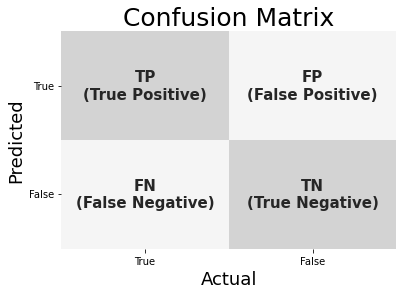

In [42]:
from matplotlib.colors import ListedColormap

ax = sns.heatmap(
    np.array([[1, 0], [0, 1]]), cbar=False,cmap=ListedColormap(['whitesmoke', 'lightgray']),
    annot=np.array([
        ['TP\n(True Positive)', 'FP\n(False Positive)'], 
        ['FN\n(False Negative)', 'TN\n(True Negative)']
    ]), fmt="", annot_kws={'size': 15, 'weight': 'bold'}
)
ax.set_xticklabels([True, False])
ax.set_xlabel('Actual', fontsize=18)
ax.set_yticklabels([True, False], rotation=0)
ax.set_ylabel('Predicted', fontsize=18)
ax.set_title('Confusion Matrix', fontsize=25)

We can write a function to calculate the metrics of the confusion matrix:

In [43]:
def evaluate(alerted_ips, attack_ips, log_ips):
    """
    Calculate true positives (TP), false positives (FP), 
    true negatives (TN), and false negatives (FN) for 
    IP addresses flagged as suspicious.
    
    Parameters:
        - alerted_ips: Pandas series of flagged IP addresses
        - attack_ips: Pandas series of attacker IP addresses
        - log_ips: Pandas series of all IP addresses seen
    
    Returns:
        Tuple of form (TP, FP, TN, FN)
    """
    tp = alerted_ips.isin(attack_ips).sum()
    tn = log_ips[log_ips.isin(alerted_ips)].isin(attack_ips).sum()
    fp = np.invert(
        log_ips[log_ips.isin(alerted_ips)].isin(attack_ips)
    ).sum()
    fn = np.invert(
        log_ips[log_ips.isin(attack_ips)].isin(alerted_ips)
    ).sum()
    return tp, fp, tn, fn

In [ ]:
# Using, partials we can reduce our typing later by providing the arguments only once:
